In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

load_dotenv()

True

In [2]:
llm = ChatOpenAI()

In [3]:
class JokeState(TypedDict):

    topic: str
    joke: str
    explanation: str

In [4]:
def generate_joke(state: JokeState):

    prompt = f"Generate a joke on the topic: {state['topic']}"
    response = llm.invoke(prompt).content
    return {"joke": response}

In [5]:
def generate_explanation(state: JokeState):

    prompt = f"Write an explanation on the joke: {state['joke']}"
    response = llm.invoke(prompt).content
    return {"explanation": response}

In [6]:
graph = StateGraph(JokeState)

graph.add_node("generate_joke", generate_joke)
graph.add_node("generate_explanation", generate_explanation)

graph.add_edge(START, "generate_joke")
graph.add_edge("generate_joke", "generate_explanation")
graph.add_edge("generate_explanation", END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)

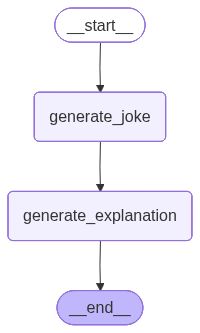

In [7]:
workflow

In [8]:
config1 = {
    "configurable": {
        "thread_id": "1"
    }
}
initial_state = {'topic': 'pizza'}
workflow.invoke(initial_state, config=config1)

{'topic': 'pizza',
 'joke': 'Why did the pizza go to the therapist?\nBecause it wanted to get a little extra topping on its emotional issues!',
 'explanation': 'This joke is a play on words, combining the idea of a pizza topping with the idea of getting emotional support from a therapist. In this case, the pizza is personified as having emotional issues that it wants to address, and instead of getting a physical topping like cheese or pepperoni, it humorously says it wants a little extra topping on its emotional issues. The joke is funny because it presents a silly and unexpected scenario of a pizza seeking psychological help, playing on the idea of therapy as a way to "top off" or improve emotional well-being.'}

In [9]:
workflow.get_state(config=config1)

StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the therapist?\nBecause it wanted to get a little extra topping on its emotional issues!', 'explanation': 'This joke is a play on words, combining the idea of a pizza topping with the idea of getting emotional support from a therapist. In this case, the pizza is personified as having emotional issues that it wants to address, and instead of getting a physical topping like cheese or pepperoni, it humorously says it wants a little extra topping on its emotional issues. The joke is funny because it presents a silly and unexpected scenario of a pizza seeking psychological help, playing on the idea of therapy as a way to "top off" or improve emotional well-being.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ec632-d161-6b77-8002-36bc7a3c549c'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-08T07:25:15.082611+00:00', parent_config={'configu

In [10]:
list(workflow.get_state_history(config=config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the therapist?\nBecause it wanted to get a little extra topping on its emotional issues!', 'explanation': 'This joke is a play on words, combining the idea of a pizza topping with the idea of getting emotional support from a therapist. In this case, the pizza is personified as having emotional issues that it wants to address, and instead of getting a physical topping like cheese or pepperoni, it humorously says it wants a little extra topping on its emotional issues. The joke is funny because it presents a silly and unexpected scenario of a pizza seeking psychological help, playing on the idea of therapy as a way to "top off" or improve emotional well-being.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ec632-d161-6b77-8002-36bc7a3c549c'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-08T07:25:15.082611+00:00', parent_config={'config

In [11]:
config2 = {"configurable": {"thread_id": "2"}}
workflow.invoke({'topic':'pasta'}, config=config2)

{'topic': 'pasta',
 'joke': 'Why did the pasta go to the party?\n\nBecause it heard it was going to be a pasta-bility good time!',
 'explanation': 'This joke is a play on words, using the term "pasta" in a punny way. The phrase "pasta-bility good time" combines "pasta" with "possibility," suggesting that the pasta went to the party because it believed there was a high likelihood of having a good time. This joke relies on the humorous juxtaposition of a food item attending a social event, creating a light-hearted and silly scenario. Overall, the joke is meant to be a playful and whimsical way to entertain and bring a smile to the listener\'s face.'}

In [12]:
workflow.get_state(config2)

StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the pasta go to the party?\n\nBecause it heard it was going to be a pasta-bility good time!', 'explanation': 'This joke is a play on words, using the term "pasta" in a punny way. The phrase "pasta-bility good time" combines "pasta" with "possibility," suggesting that the pasta went to the party because it believed there was a high likelihood of having a good time. This joke relies on the humorous juxtaposition of a food item attending a social event, creating a light-hearted and silly scenario. Overall, the joke is meant to be a playful and whimsical way to entertain and bring a smile to the listener\'s face.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0ec633-0587-6b4f-8002-5e119b719637'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-08T07:25:20.550765+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '

In [13]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the pasta go to the party?\n\nBecause it heard it was going to be a pasta-bility good time!', 'explanation': 'This joke is a play on words, using the term "pasta" in a punny way. The phrase "pasta-bility good time" combines "pasta" with "possibility," suggesting that the pasta went to the party because it believed there was a high likelihood of having a good time. This joke relies on the humorous juxtaposition of a food item attending a social event, creating a light-hearted and silly scenario. Overall, the joke is meant to be a playful and whimsical way to entertain and bring a smile to the listener\'s face.'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f0ec633-0587-6b4f-8002-5e119b719637'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-08T07:25:20.550765+00:00', parent_config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': 

## Time Travel

In [15]:
workflow.get_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f0ec632-b6ea-6cbd-8000-c0dfdf144a69"}})

StateSnapshot(values={'topic': 'pizza'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_id': '1f0ec632-b6ea-6cbd-8000-c0dfdf144a69'}}, metadata={'source': 'loop', 'step': 0, 'parents': {}}, created_at='2026-01-08T07:25:12.307604+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ec632-b6e6-6309-bfff-a6cdf26486d7'}}, tasks=(PregelTask(id='be81e879-d083-5173-3790-274bb7396635', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result={'joke': 'Why did the pizza go to the therapist?\nBecause it wanted to get a little extra topping on its emotional issues!'}),), interrupts=())

In [16]:
workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f0ec632-b6ea-6cbd-8000-c0dfdf144a69"}})

{'topic': 'pizza',
 'joke': 'Why did the pizza go to the doctor? Because it was feeling a little "saucy"!',
 'explanation': 'This joke is a play on words using the term "saucy." In one context, "saucy" can mean behaving boldly or cheekily. However, in the case of pizza, the term "saucy" refers to the tomato sauce commonly used as a base on pizza. The joke humorously suggests that the reason the pizza went to the doctor is because it was feeling a little "saucy," meaning it had too much tomato sauce on it. This clever wordplay adds a humorous twist to the idea of a pizza seeking medical attention for simply having too much sauce on it.'}

In [17]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the doctor? Because it was feeling a little "saucy"!', 'explanation': 'This joke is a play on words using the term "saucy." In one context, "saucy" can mean behaving boldly or cheekily. However, in the case of pizza, the term "saucy" refers to the tomato sauce commonly used as a base on pizza. The joke humorously suggests that the reason the pizza went to the doctor is because it was feeling a little "saucy," meaning it had too much tomato sauce on it. This clever wordplay adds a humorous twist to the idea of a pizza seeking medical attention for simply having too much sauce on it.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ec635-9147-62f5-8002-73dfa979de8d'}}, metadata={'source': 'loop', 'step': 2, 'parents': {}}, created_at='2026-01-08T07:26:28.891489+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ec635-84

## Updating State

Whenever we update a checkpoint, it basically creates a separate workflow with different checkpoint id

In [18]:
workflow.update_state({"configurable": {"thread_id": "1", "checkpoint_id": "1f0ec632-b6ea-6cbd-8000-c0dfdf144a69", "checkpoint_ns": ""}}, {'topic':'samosa'})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0ec636-3ecc-64d8-8001-225e25fc014e'}}

In [19]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'samosa'}, next=('generate_joke',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ec636-3ecc-64d8-8001-225e25fc014e'}}, metadata={'source': 'update', 'step': 1, 'parents': {}}, created_at='2026-01-08T07:26:47.086392+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ec632-b6ea-6cbd-8000-c0dfdf144a69'}}, tasks=(PregelTask(id='2ea55618-0c13-e4c8-d5ba-e5109323a1a7', name='generate_joke', path=('__pregel_pull', 'generate_joke'), error=None, interrupts=(), state=None, result=None),), interrupts=()),
 StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza go to the doctor? Because it was feeling a little "saucy"!', 'explanation': 'This joke is a play on words using the term "saucy." In one context, "saucy" can mean behaving boldly or cheekily. However, in the case of pizza, the term "saucy" refers to the tomato sauce commonly used as a base on pizza. The joke hu

In [20]:
workflow.invoke(None, {"configurable": {"thread_id": "1", "checkpoint_id": "1f0ec636-3ecc-64d8-8001-225e25fc014e"}})

{'topic': 'samosa',
 'joke': 'Why did the samosa go to school?\n\nTo become a little more well-rounded!',
 'explanation': 'This joke plays on the double meaning of the phrase "well-rounded." In one sense, it can mean to have a good mixture of knowledge or skills in various areas. In the context of the joke, the samosa (a triangular pastry filled with spiced potatoes or meat) is literally becoming more well-rounded by attending school, where it will gain knowledge and maybe even expand its shape! The humor comes from the unexpected twist on the phrase and the amusing image of a samosa attending school to become more "well-rounded."'}

In [21]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'samosa', 'joke': 'Why did the samosa go to school?\n\nTo become a little more well-rounded!', 'explanation': 'This joke plays on the double meaning of the phrase "well-rounded." In one sense, it can mean to have a good mixture of knowledge or skills in various areas. In the context of the joke, the samosa (a triangular pastry filled with spiced potatoes or meat) is literally becoming more well-rounded by attending school, where it will gain knowledge and maybe even expand its shape! The humor comes from the unexpected twist on the phrase and the amusing image of a samosa attending school to become more "well-rounded."'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ec637-1128-6596-8003-b5389651b307'}}, metadata={'source': 'loop', 'step': 3, 'parents': {}}, created_at='2026-01-08T07:27:09.144180+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f0ec637-04ab-6

## Fault Tolerance

In [22]:
import time

In [23]:
# 1. Define the state
class CrashState(TypedDict):
    input: str
    step1: str
    step2: str

In [24]:
# 2. Define steps
def step_1(state: CrashState) -> CrashState:
    print("✅ Step 1 executed")
    return {"step1": "done", "input": state["input"]}

def step_2(state: CrashState) -> CrashState:
    print("⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)")
    time.sleep(1000)  # Simulate long-running hang
    return {"step2": "done"}

def step_3(state: CrashState) -> CrashState:
    print("✅ Step 3 executed")
    return {"done": True}

In [25]:
# 3. Build the graph
builder = StateGraph(CrashState)
builder.add_node("step_1", step_1)
builder.add_node("step_2", step_2)
builder.add_node("step_3", step_3)

builder.set_entry_point("step_1")
builder.add_edge("step_1", "step_2")
builder.add_edge("step_2", "step_3")
builder.add_edge("step_3", END)

checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

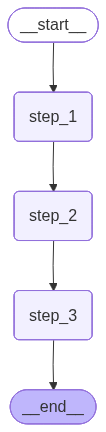

In [26]:
graph

In [ ]:
try:
    print("▶️ Running graph: Please manually interrupt during Step 2...")
    graph.invoke({"input": "start"}, config={"configurable": {"thread_id": 'thread-1'}})
except KeyboardInterrupt:
    print("❌ Kernel manually interrupted (crash simulated).")

▶️ Running graph: Please manually interrupt during Step 2...
✅ Step 1 executed
⏳ Step 2 hanging... now manually interrupt from the notebook toolbar (STOP button)


In [ ]:
# 6. Re-run to show fault-tolerant resume
print("\n🔁 Re-running the graph to demonstrate fault tolerance...")
final_state = graph.invoke(None, config={"configurable": {"thread_id": 'thread-1'}})
print("\n✅ Final State:", final_state)

In [ ]:
list(graph.get_state_history({"configurable": {"thread_id": 'thread-1'}}))